# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

Para este primer paso importo pandas con import pandas as pd. Llamo a cada uno de los dataframe utilizando pd.read_csv() y su correspondiente path de localización entre los paréntesis y finalmente para visualizar la información con .info().

In [46]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np


In [47]:
df_orders = pd.read_csv('instacart_orders.csv', sep=';') 

df_products = pd.read_csv('products.csv', sep=';')

df_aisles  = pd.read_csv('aisles.csv',  sep=';')

df_departments = pd.read_csv('departments.csv',  sep=';')

df_order_products = pd.read_csv('order_products.csv', sep= ';')


In [48]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [49]:
# mostrar información del DataFrame
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [50]:
df_aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [51]:
# mostrar información del DataFrame
df_departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [52]:
# mostrar información del DataFrame
df_order_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


Conclusión primer paso:
El uso del método .info() brinda información muy útil para iniciar con el procesamiento de los datos, es posible conocer el numero de filas con rangeIndex, el número y nombre de las columnas que componen las tablas y el tipo de dato entre otros.


# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Para el procesamiento de datos puedo aplicar métodos para hallar los valores ausentes como  .isna(), .drop() o .dropna() y para  encontrar los duplicados uso los métodos .duplicated(), .drop_duplicates() entre otros

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [53]:
# Revisa si hay pedidos duplicados

# y= df_1.duplicated().sum() # con este método identifico que hay 15 duplicados
# print(y)

duplicate=df_orders[df_orders.duplicated()]
print(duplicate)


        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   183220            48          3 

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

Si, hay 15 lineas duplicadas en el Dataframe, el patrón común en los duplicados en la columna order_dow todos los valores son 3 y en la columna order_hour_of_day los valores son 2.

In [54]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.

print(df_orders[(df_orders['order_dow'] == 3) & (df_orders['order_hour_of_day']== 2)])




        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

¿Qué sugiere este resultado?

De los 121 pedido realizados el día miercoles a la 2 am, 15 pedidos estan duplicados.

In [55]:
# Elimina los pedidos duplicados
df_orders = df_orders.drop_duplicates(keep=False)

print(df_orders)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
0        1515936   183418            11          6                 13   
1        1690866   163593             5          5                 12   
2        1454967    39980             4          5                 19   
3        1768857    82516            56          0                 20   
4        3007858   196724             2          4                 12   
...          ...      ...           ...        ...                ...   
478962   3210681     5617             5          1                 14   
478963   3270802   112087             2          3                 13   
478964    885349    82944            16          2                 11   
478965    216274     4391             3          3                  8   
478966   2071924     1730            18          1                 14   

        days_since_prior_order  
0                         30.0  
1                          9.0  
2                       

In [56]:
# Vuelve a verificar si hay filas duplicadas
ckeck_duplicates= df_orders.duplicated()
print(ckeck_duplicates)


0         False
1         False
2         False
3         False
4         False
          ...  
478962    False
478963    False
478964    False
478965    False
478966    False
Length: 478937, dtype: bool


In [57]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos

duplicate_id = df_orders[df_orders.duplicated('order_id')]
print(duplicate_id)


Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


Describe brevemente tus hallazgos y lo que hiciste con ellos


Primero, reviso los duplicados que tiene el dataframe de pedidos. Después reviso los duplicados del miércoles a la 2 am. Procedo a eliminar los duplicados con el método drop.duplicates(). Finalmente verifico que los duplicados hallan sido eliminados en su totalidad.

### `products` data frame

In [58]:
# Verifica si hay filas totalmente duplicadas

check_product= df_products[df_products.duplicated()]
print(check_product)




Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


In [59]:
# Revisa únicamente si hay ID de departamentos duplicados

department_id= df_products[df_products.duplicated('department_id')]

print(department_id)



       product_id                                     product_name  aisle_id  \
4               5                        Green Chile Anytime Sauce         5   
6               7                   Pure Coconut Water With Orange        98   
7               8                Cut Russet Potatoes Steam N' Mash       116   
9              10   Sparkling Orange Juice & Prickly Pear Beverage       115   
10             11                                Peach Mango Juice        31   
...           ...                                              ...       ...   
49689       49690                    HIGH PERFORMANCE ENERGY DRINK        64   
49690       49691                    ORIGINAL PANCAKE & WAFFLE MIX       130   
49691       49692  ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR       130   
49692       49693                           SPRING WATER BODY WASH       127   
49693       49694                          BURRITO- STEAK & CHEESE        38   

       department_id  
4               

In [60]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)

# revisa duplicados en product_name
duplicate_products = df_products[df_products.duplicated('product_name')] 
print(duplicate_products)

#convierte en minuscula los nombres

name_lower= df_products['product_name'].str.lower()
print(name_lower)



       product_id product_name  aisle_id  department_id
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
436           437          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1257 rows x 4 columns]
0                               chocolate sandwich cookies
1                                         all-seasons salt
2                     robust golden unsweetened oolong tea
3        smart ones classic favorites mini rigatoni wit...
4                                green chile anytime sauce
        

In [61]:
# Revisa si hay nombres duplicados de productos no faltantes

print(df_products[df_products['product_name'].isna()])

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Describe brevemente tus hallazgos y lo que hiciste con ellos.

In [62]:
df_products[~(df_products['product_name'].isna())].duplicated('product_name').sum()

0

Se encontraron 1257 valores no faltantes NaN

### `departments` data frame

In [63]:
# Revisa si hay filas totalmente duplicadas

departments= df_departments.duplicated().sum()
print(departments)

0


In [64]:
# Revisa únicamente si hay IDs duplicadas de productos

department_id = df_departments['department_id'].duplicated().sum()
print(department_id )

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

No encontre valores duplicados en la columna departments

### `aisles` data frame

In [65]:
# Revisa si hay filas totalmente duplicadas

aisles= df_aisles.duplicated().sum()
print(aisles)

0


In [66]:
# Revisa únicamente si hay IDs duplicadas de productos

aisle_id= df_aisles['aisle_id'].duplicated().sum()
print(aisle_id)

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

No hay valores duplicados en la columna aisles

### `order_products` data frame

In [67]:
# Revisa si hay filas totalmente duplicadas

order_products= df_order_products.duplicated().sum()
print(order_products)



0


In [68]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso

order_products= df_order_products.duplicated(subset=None, keep="first")
order_products= order_products.sum()

print(order_products)


0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Para revisar si habian duplicados en el dataframe order_products, primero utilice el método .duplicated(), y en la segunda verificación, use el método .duplicated() pasando como argumento subset y keep. para ambos casos los duplicados son cero.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [69]:
# Encuentra los valores ausentes en la columna 'product_name'

df_products['product_name'].isna().sum()

1258

Describe brevemente cuáles son tus hallazgos.

En el dataframe products, realize la verificación de valores ausentes en la columna product_name y encontrE 1258 valores NaN.

In [70]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?

print( df_products[(df_products['product_name'].isna()) & (df_products['aisle_id']!= 100)]) # relación entre valores ausentes del nombre de producto y pasillo distintos a 100



Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


Describe brevemente cuáles son tus hallazgos.

Todos los nombres de producto de valores ausentes esta relacionados con el aisle id 100

In [71]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?

print( df_products[(df_products['product_name'].isna()) & (df_products['department_id']!= 21)]) # relación entre valores ausentes del nombre de producto y departamente id 21

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


Describe brevemente cuáles son tus hallazgos.

Todos los nombres de producto de valores ausentes esta relacionados con el departamento id 21

In [72]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.

print(df_products[(df_products['aisle_id']== 100) & (df_products['department_id']== 21)])


       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Describe brevemente cuáles son tus hallazgos.

Al revisar la columna aisle_id igual a 100 y la columna departmente_id igual 21, se determina que todos los nombres de producto ausentes se relacionan con dichas columnas

In [73]:
# Completa los nombres de productos ausentes con 'Unknown'

df_products['product_name'] = df_products['product_name'].fillna(value='Unknown')

print(df_products['product_name'])


0                               Chocolate Sandwich Cookies
1                                         All-Seasons Salt
2                     Robust Golden Unsweetened Oolong Tea
3        Smart Ones Classic Favorites Mini Rigatoni Wit...
4                                Green Chile Anytime Sauce
                               ...                        
49689                        HIGH PERFORMANCE ENERGY DRINK
49690                        ORIGINAL PANCAKE & WAFFLE MIX
49691      ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR
49692                               SPRING WATER BODY WASH
49693                              BURRITO- STEAK & CHEESE
Name: product_name, Length: 49694, dtype: object


Describe brevemente tus hallazgos y lo que hiciste con ellos.


Utilizando el método .fillna() pasandole el argumento value=  se pueden modificar los valores ausentes por 'Unknown'

### `orders` data frame

In [74]:
# Encuentra los valores ausentes

df_orders['days_since_prior_order'].isna().sum()

28815

In [75]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?

print(df_orders[df_orders['order_id'].isna()])

Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


no hay valores ausentes en la columna order_id

Describe brevemente tus hallazgos y lo que hiciste con ellos.

### `order_products` data frame

In [76]:
# Encuentra los valores ausentes

print(df_order_products['add_to_cart_order'].isna().sum())

836


In [77]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?

print(df_order_products['add_to_cart_order'].min(), df_order_products['add_to_cart_order'].max())


1.0 64.0


Describe brevemente cuáles son tus hallazgos.

El valor mínimo es 0 y el máximo es de 64

In [78]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'

order_id_nan = df_order_products[df_order_products['add_to_cart_order'].isna()]['order_id']
print(order_id_nan)



737        2449164
9926       1968313
14394      2926893
16418      1717990
30114      1959075
            ...   
4505662    1800005
4511400    1633337
4517562     404157
4534112    1673227
4535739    1832957
Name: order_id, Length: 836, dtype: int64


In [79]:
df_order_nan = df_order_products[df_order_products.order_id.isin(order_id_nan)]
df_order_nan.groupby('order_id')['product_id'].count().min()


65

Describe brevemente cuáles son tus hallazgos.

No hay ningun pedido que tenga más de 64 productos.


In [80]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.

df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].fillna(value= 999)
print(df_order_products['add_to_cart_order'].isna().sum())



0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

No hay valores ausentes en la columna 'add_to_cart'

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos


Conclusión segundo paso:
En este paso se procesan los datos de los distintos dataframe para limpiar valores ausentes y duplicados,  utilizar los métodos de filtrado  con el fin de accesar a información específica. Tambíen se identificaron valores maximos y minimos.

# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [81]:
# Verifica que los valores en las columnas 'order_hour_of_day' y 'order_dow' en la tabla orders sean razonables (es decir, 'order_hour_of_day' oscile entre 0 y 23 y 'order_dow' oscile entre 0 y 6).

df_orders['order_hour_of_day'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [82]:
# Verifica que los valores en las columnas 'order_hour_of_day' y 'order_dow' en la tabla orders sean razonables (es decir, 'order_hour_of_day' oscile entre 0 y 23 y 'order_dow' oscile entre 0 y 6).

df_orders['order_dow'].sort_values().unique()


array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

Escribe aquí tus conclusiones

Los valores de la columna 'order_hour_of_day' se encuentra entre el rango de 0-23,  y los valores de la columna  'order_dow' se encuentran entre 0-6.

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

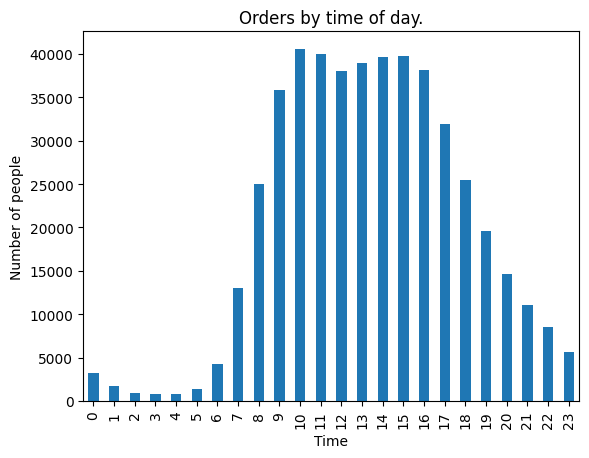

In [83]:
hourly_orders = df_orders.groupby('order_hour_of_day')['user_id'].count()



hourly_orders.plot(x='order_hour_of_day',
        y='user_id',
        title='Orders by time of day.',
        kind='bar',
        xlabel='Time',
        ylabel='Number of people')
        
plt.show()




Escribe aquí tus conclusiones

Según la gráfica se puede concluir que las personas realizan más ordenes entre las 10 a 15 horas.


### [A3] ¿Qué día de la semana compran víveres las personas?

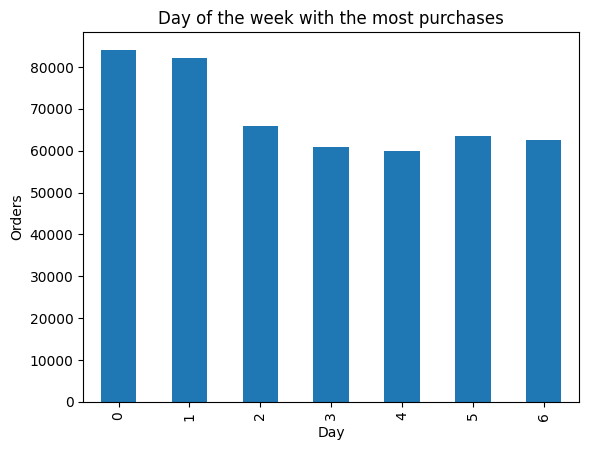

In [84]:
purchase_day_of_week = df_orders.groupby('order_dow')['user_id'].count()


purchase_day_of_week.plot(x='order_dow',
        y='user_id',
        title='Day of the week with the most purchases',
        kind='bar',
        xlabel='Day',
        ylabel='Orders')
        
plt.show()

Escribe aquí tus conclusiones

A partir del gráfico, El domingo es el dia que más compran viveres las personas

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

In [85]:
print(df_orders['days_since_prior_order'].min(), df_orders['days_since_prior_order'].max())

0.0 30.0


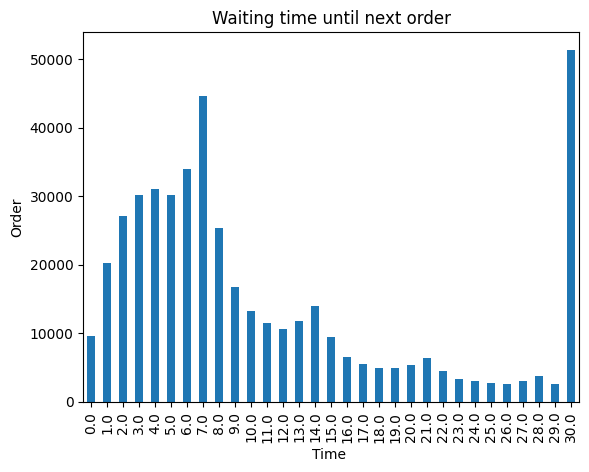

In [86]:
next_purchase = df_orders.groupby('days_since_prior_order')['user_id'].count()

next_purchase .plot(x='days_since_prior_order',
            y='user_id',
            title='Waiting time until next order',
            kind='bar',
            xlabel='Time ',
            ylabel='Order',
            xlim=[0, 30])
        
plt.show()

Escribe aquí tus conclusiones

El número de días transcurridos desde que este cliente hizo su pedido anterior es de 7 días aproximadamente.

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

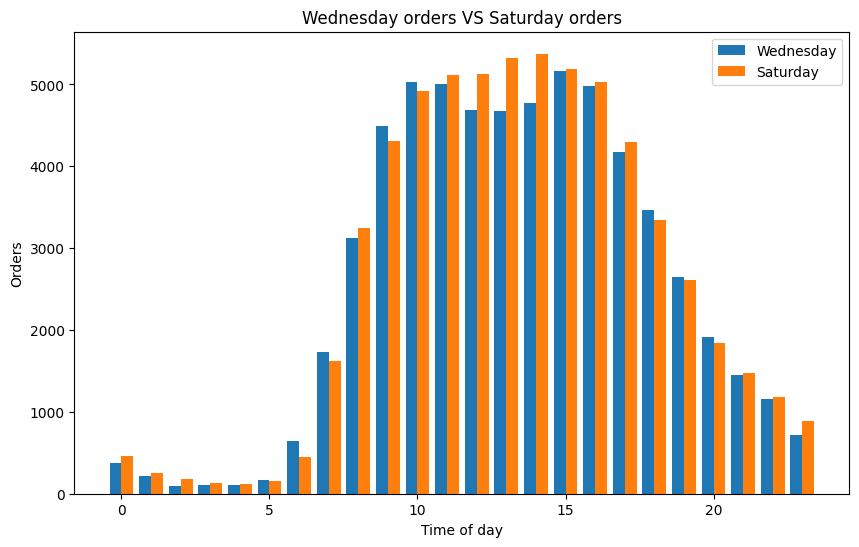

In [87]:
# se trae la columna miercoles y se ordena
wednesday= df_orders[df_orders['order_dow']==3]
order_wednesday = wednesday['order_hour_of_day'].value_counts().sort_index()


# se trae la columna sabado y se ordena
saturday = df_orders[df_orders['order_dow']==6]
order_saturday= saturday ['order_hour_of_day'].value_counts().sort_index()

# figsize controla el tamaño del grafico
fig, ax = plt.subplots(figsize=(10, 6))

# ax.bar grafica los valores de los dias de la semana
 
ax.bar(order_wednesday.index -0.2, order_wednesday.values,width =0.4,label='wednesday') 

ax.bar(order_saturday.index +0.2,order_saturday.values,width =0.4, label='saturday') 

# etiquetas y titulo del grafico
ax.set_xlabel('Time of day')
ax.set_ylabel('Orders')
ax.set_title('Wednesday orders VS Saturday orders')

#  texto en la leyenda
ax.legend(['Wednesday', 'Saturday'])

plt.show()


Escribe aquí tus conclusiones

En general el día sabado hay mayor cantidad de pedidos comparado con el día miercoles.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

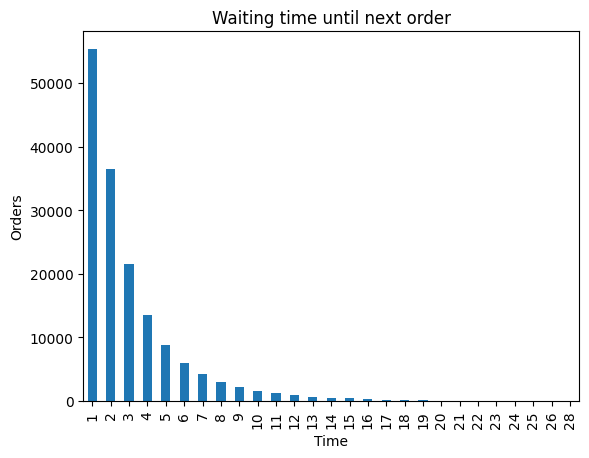

In [88]:
# Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido,
#cuá

distribution_orders=df_orders.groupby('user_id')['order_id'].count().value_counts().sort_index()


distribution_orders.plot(x='days_since_prior_order',
        y='user_id',
        title='Waiting time until next order',
        kind='bar',
        xlabel='Time',
        ylabel='Orders')
        
plt.show()



### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [89]:
# ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

best_selling_products = df_products.merge(df_order_products, on='product_id')

best_selling_products=best_selling_products.groupby(['product_id','product_name' ])['order_id'].count().sort_values(ascending=False).head(20)
print(best_selling_products)
   

product_id  product_name            
24852       Banana                      66050
13176       Bag of Organic Bananas      53297
21137       Organic Strawberries        37039
21903       Organic Baby Spinach        33971
47209       Organic Hass Avocado        29773
47766       Organic Avocado             24689
47626       Large Lemon                 21495
16797       Strawberries                20018
26209       Limes                       19690
27845       Organic Whole Milk          19600
27966       Organic Raspberries         19197
22935       Organic Yellow Onion        15898
24964       Organic Garlic              15292
45007       Organic Zucchini            14584
39275       Organic Blueberries         13879
49683       Cucumber Kirby              13675
28204       Organic Fuji Apple          12544
5876        Organic Lemon               12232
8277        Apple Honeycrisp Organic    11993
40706       Organic Grape Tomatoes      11781
Name: order_id, dtype: int64


Escribe aquí tus conclusiones

El producto Banana es el más popular, luego le sigue Bag of Organic Bananas y en tercer lugar esta Organic Strawberries. Los productos más populares tiene más de 11781 pedidos.

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

The average number of items ordered is: 10.098983215049127


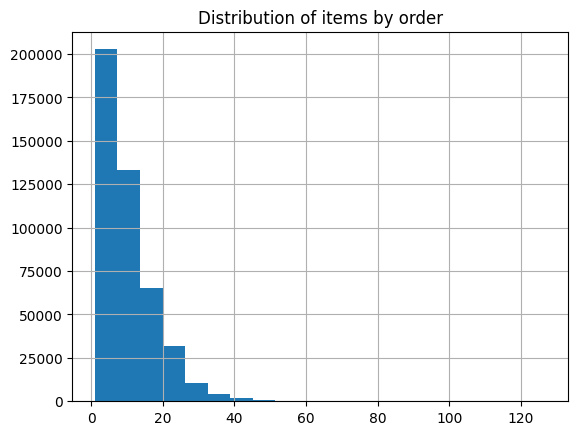

In [90]:
# Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?

average_items_ordered = df_order_products.groupby('order_id')['product_id'].count().mean()
print(f'The average number of items ordered is: {average_items_ordered}')

average_items_ordered = df_order_products.groupby('order_id')['product_id'].count()


plt.hist(average_items_ordered, bins=20)
plt.title('Distribution of items by order')
plt.xlabel=('Items by order')
plt.ylabel=('Frequency')
plt.grid(True)
plt.show()

Escribe aquí tus conclusiones

El promedio de productoscompardos por orden es de 10.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [91]:
# ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [92]:
reorder_product = df_products.merge(df_order_products, on='product_id').query("reordered == 1")

reorder_product =reorder_product.groupby(['product_id' ,'product_name', ])['order_id'].count().sort_values(ascending=False).head(20)


print(reorder_product)

product_id  product_name            
24852       Banana                      55763
13176       Bag of Organic Bananas      44450
21137       Organic Strawberries        28639
21903       Organic Baby Spinach        26233
47209       Organic Hass Avocado        23629
47766       Organic Avocado             18743
27845       Organic Whole Milk          16251
47626       Large Lemon                 15044
27966       Organic Raspberries         14748
16797       Strawberries                13945
26209       Limes                       13327
22935       Organic Yellow Onion        11145
24964       Organic Garlic              10411
45007       Organic Zucchini            10076
49683       Cucumber Kirby               9538
28204       Organic Fuji Apple           8989
8277        Apple Honeycrisp Organic     8836
39275       Organic Blueberries          8799
5876        Organic Lemon                8412
49235       Organic Half & Half          8389
Name: order_id, dtype: int64


Escribe aquí tus conclusiones

Los producto que se vuelven a pedir con mayor frecuencia son Banana, Bag of Organic Bananas y Organic Strawberries .

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [93]:

# Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?

In [94]:
df_order_products.groupby('product_id')['reordered'].mean().sort_values(ascending=False)

product_id
14721    1.0
20949    1.0
6723     1.0
6732     1.0
45088    1.0
        ... 
10485    0.0
37690    0.0
10484    0.0
10474    0.0
42984    0.0
Name: reordered, Length: 45573, dtype: float64

Escribe aquí tus conclusiones

La taza de repetición de compra de un producto es de 1.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto

In [ ]:
client_product= df_order_products.merge(df_orders)

client_product= client_product.groupby( 'user_id')['reordered'].mean()

print(client_product)


user_id
2         0.038462
4         0.000000
5         0.666667
6         0.000000
7         0.928571
            ...   
206203    0.222222
206206    0.714286
206207    0.891304
206208    0.696000
206209    0.320000
Name: reordered, Length: 149623, dtype: float64


Escribe aquí tus conclusiones

La proporción de pedir un producto nuevamente varia según el usuario. 


### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

In [ ]:
first_product = df_products.merge(df_order_products, on='product_id')

first_product= first_product[first_product['add_to_cart_order']== 1]

first_product =first_product.groupby(['product_id' ,'product_name'])['order_id'].count().sort_values(ascending=False).head(20)


print(first_product)

product_id  product_name               
24852       Banana                         15562
13176       Bag of Organic Bananas         11026
27845       Organic Whole Milk              4363
21137       Organic Strawberries            3946
47209       Organic Hass Avocado            3390
21903       Organic Baby Spinach            3336
47766       Organic Avocado                 3044
19660       Spring Water                    2336
16797       Strawberries                    2308
27966       Organic Raspberries             2024
44632       Sparkling Water Grapefruit      1914
49235       Organic Half & Half             1797
47626       Large Lemon                     1737
196         Soda                            1733
38689       Organic Reduced Fat Milk        1397
26209       Limes                           1370
12341       Hass Avocados                   1340
5785        Organic Reduced Fat 2% Milk     1310
27086       Half & Half                     1309
43352       Raspberries      

Los productos que las personas ponen primero en su carrito son: Banana y Bag of Organic Bananas.